## Assignment -PCA
Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df


In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [2]:
wine=pd.read_csv("c:/users/mahesh/datasetcsv/wine.csv")

In [3]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
wine1=wine.iloc[:,1:]

In [5]:
wine1.dtypes

Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [6]:

# Converting into numpy array
wyne=wine1.values
wyne

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [7]:
# Normalizing the numerical data 
wine_normal = scale(wyne)

In [8]:
wine_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [49]:
pca = PCA(n_components = 3)
pca_values = pca.fit_transform(wine_normal)

In [50]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631])

In [51]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([36.2 , 55.41, 66.53])

In [52]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592]])

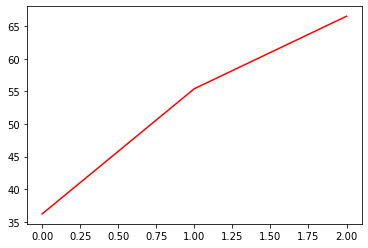

In [53]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [54]:
 pca_values
    

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [76]:
    m=0
    n=1
    for i in range(3):
        pc= pca_values[:,m:n]
        m=m+1
        n=n+1
        pc1[m]=pd.DataFrame(pc)
    i=i+1
        



 



In [67]:
pc1

,0,1,2,3
0,-0.165739,3.316751,-1.443463,-0.165739
1,-2.026457,2.209465,0.333393,-2.026457
2,0.982819,2.516740,-1.031151,0.982819
3,-0.176192,3.757066,-2.756372,-0.176192
4,2.026688,1.008908,-0.869831,2.026688
...,...,...,...,...
173,-0.342570,-3.370524,-2.216289,-0.342570
174,0.207581,-2.601956,-1.757229,0.207581
175,-0.940942,-2.677839,-2.760899,-0.940942
176,-0.550696,-2.387017,-2.297347,-0.550696


In [79]:
pc1.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [80]:

con=wine.iloc[:,0:1]

In [81]:
pc1.shape

(178, 4)

In [82]:
final_df=pd.concat([con,pc1],join='outer', axis=1)

In [83]:
final_df

,Type,0,1,2,3
0,1,-0.165739,3.316751,-1.443463,-0.165739
1,1,-2.026457,2.209465,0.333393,-2.026457
2,1,0.982819,2.516740,-1.031151,0.982819
3,1,-0.176192,3.757066,-2.756372,-0.176192
4,1,2.026688,1.008908,-0.869831,2.026688
...,...,...,...,...,...
173,3,-0.342570,-3.370524,-2.216289,-0.342570
174,3,0.207581,-2.601956,-1.757229,0.207581
175,3,-0.940942,-2.677839,-2.760899,-0.940942
176,3,-0.550696,-2.387017,-2.297347,-0.550696


In [84]:
final=final_df

In [85]:
final

,Type,0,1,2,3
0,1,-0.165739,3.316751,-1.443463,-0.165739
1,1,-2.026457,2.209465,0.333393,-2.026457
2,1,0.982819,2.516740,-1.031151,0.982819
3,1,-0.176192,3.757066,-2.756372,-0.176192
4,1,2.026688,1.008908,-0.869831,2.026688
...,...,...,...,...,...
173,3,-0.342570,-3.370524,-2.216289,-0.342570
174,3,0.207581,-2.601956,-1.757229,0.207581
175,3,-0.940942,-2.677839,-2.760899,-0.940942
176,3,-0.550696,-2.387017,-2.297347,-0.550696


In [86]:
final

,Type,0,1,2,3
0,1,-0.165739,3.316751,-1.443463,-0.165739
1,1,-2.026457,2.209465,0.333393,-2.026457
2,1,0.982819,2.516740,-1.031151,0.982819
3,1,-0.176192,3.757066,-2.756372,-0.176192
4,1,2.026688,1.008908,-0.869831,2.026688
...,...,...,...,...,...
173,3,-0.342570,-3.370524,-2.216289,-0.342570
174,3,0.207581,-2.601956,-1.757229,0.207581
175,3,-0.940942,-2.677839,-2.760899,-0.940942
176,3,-0.550696,-2.387017,-2.297347,-0.550696


In [87]:
final_df = final_df.rename(columns={0: 'pc-1', 1: 'pc-2',2: 'pc-3', 3: 'pc-4'})

In [88]:
final_df

,Type,pc-1,pc-2,pc-3,pc-4
0,1,-0.165739,3.316751,-1.443463,-0.165739
1,1,-2.026457,2.209465,0.333393,-2.026457
2,1,0.982819,2.516740,-1.031151,0.982819
3,1,-0.176192,3.757066,-2.756372,-0.176192
4,1,2.026688,1.008908,-0.869831,2.026688
...,...,...,...,...,...
173,3,-0.342570,-3.370524,-2.216289,-0.342570
174,3,0.207581,-2.601956,-1.757229,0.207581
175,3,-0.940942,-2.677839,-2.760899,-0.940942
176,3,-0.550696,-2.387017,-2.297347,-0.550696


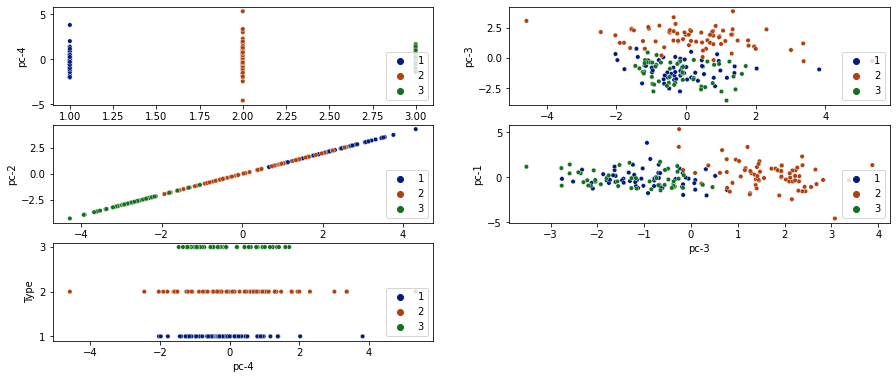

In [90]:
import seaborn as sns

plt.figure(figsize=(15,30))
n=0
m=4  
for i in enumerate(final_df.columns):   
    plt.subplot(14,2,i[0]+1)
    cr=final_df.columns
    sns.scatterplot(x=cr[n],y=cr[m], hue='Type', 
    data=final_df, palette='dark', s=20);
    plt.legend(loc='lower right');
    plt.legend(loc='lower right');
    n=n+1
    m=m-1

In [92]:
final_df['pc1']

KeyError: 'pc1'

In [ ]:
pc

In [ ]:
pc1